In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [17]:
#Set Matplotlib defaults

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=18)

In [18]:
red_wine = pd.read_csv('data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
red_wine.shape

(1599, 12)

In [21]:
input_shape =[11]

In [40]:
model = keras.Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(units=1, activation='relu'))



In [34]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<KerasVariable shape=(11, 1), dtype=float32, path=sequential_5/dense_5/kernel>

Bias
<KerasVariable shape=(1,), dtype=float32, path=sequential_5/dense_5/bias>


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


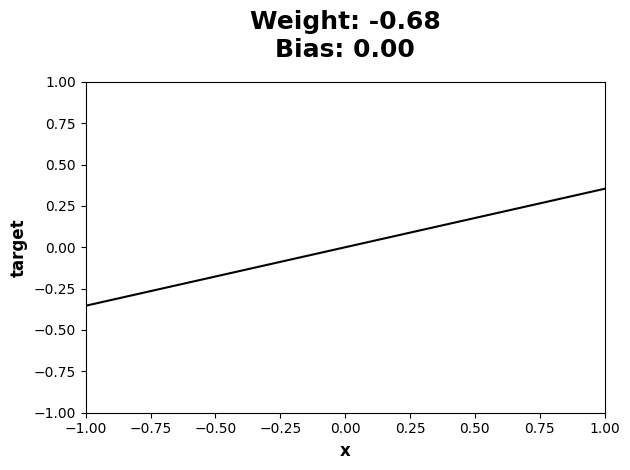

In [35]:
#Plot the output of an untrained linear model

model = keras.Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=1))


x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('target')
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [37]:
concrete = pd.read_csv('data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [43]:
model = keras.Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=512, activation='relu')) #hidden layer 1
model.add(Dense(units=512, activation='relu')) #hidden layer 2
model.add(Dense(units=512, activation='relu'))
model.add(Dense(1))

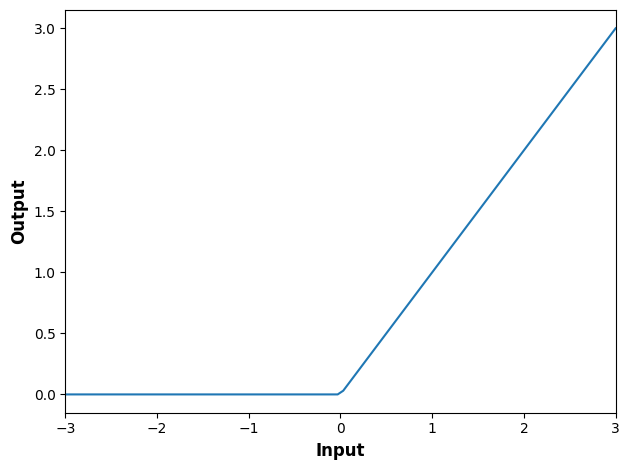

In [49]:
#Alternatives to ReLU
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


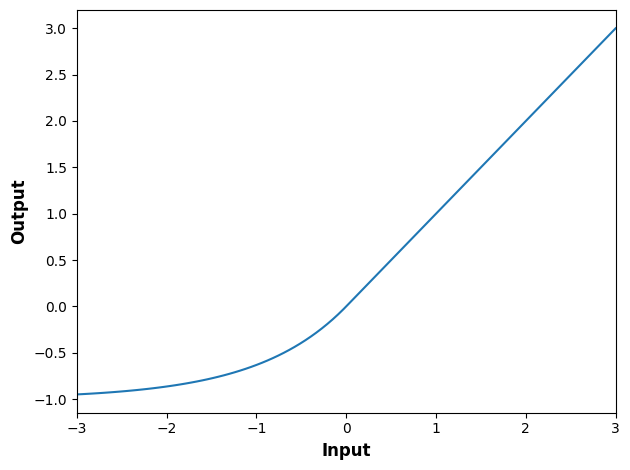

In [50]:
#Alternatives to ReLU
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


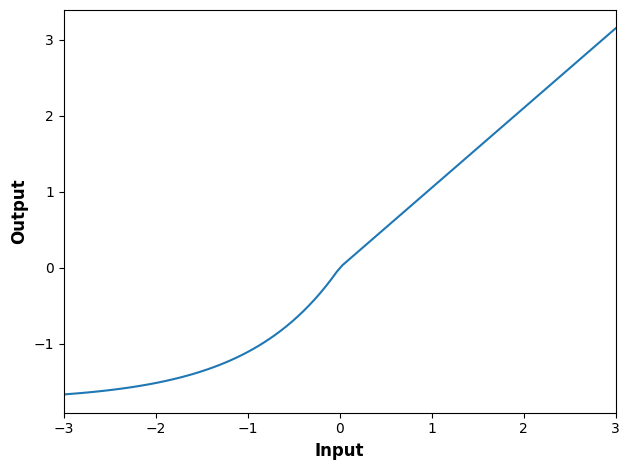

In [51]:
#Alternatives to ReLU
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


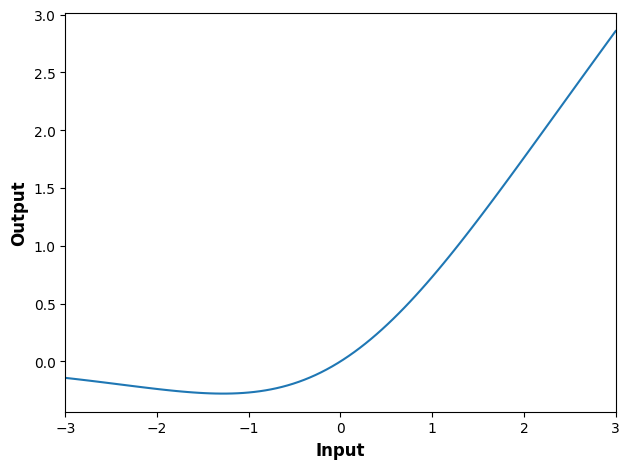

In [52]:
#Alternatives to ReLU
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


In [ ]:
"""
- loss function: measures how good the network predictions are.
- optimizer: can tell the network how to change its weights

MAE: mean absolute error.
- For y_pred, MAE measures disparity from the true target y_true
- Total MAE loss is the mean of absolute differences.

MSE, Huber loss also used in regression problems

Stochastic Gradient Descent
- Optimizers for deep learning
- Each training step:
    - Sample some training data and run it through the network to make predictions
    - Measure the loss between the predictions and true values
    - Adjust weights in a direction that minimizes loss
    
Batch: Each iteration's sample of training data.
Epoch: Complete round of the training data.

Learning rate and size of batches are the two parameters that have the largest effect on how SGD training proceeds.

- Adam:  SGD algorithm that has an adaptive learning rate - "self tuning"
"""

In [53]:
model.compile(
    optimizer='adam',
    loss = 'mae',
)

In [54]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
from IPython.display import display

df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(df_train)
df_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [62]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [63]:
X_train.shape

(1119, 11)

In [67]:
model = keras.Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1)) #output layer


In [69]:
model.compile (
    optimizer = 'adam',
    loss = 'mae'
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5289 - val_loss: 2.7070
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1194 - val_loss: 1.9930
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8952 - val_loss: 1.3283
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0539 - val_loss: 1.2370
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1093 - val_loss: 0.6654
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7803 - val_loss: 0.9254
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7993 - val_loss: 0.7287
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6668 - val_loss: 0.5799
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6035 - val_loss: 0.5790
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6023 - val_loss: 0.6825


<Axes: >

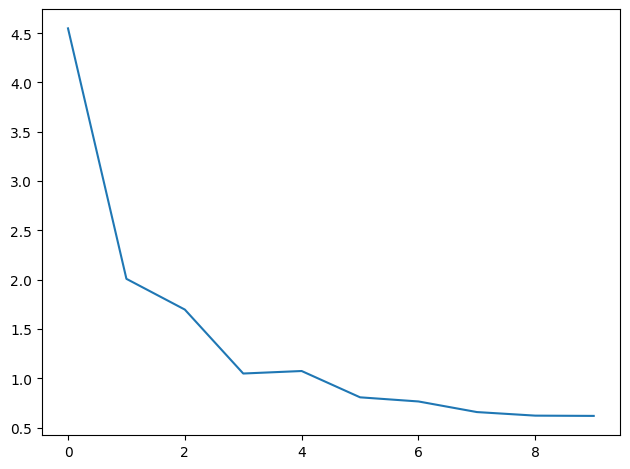

In [70]:
"""
The 'fit' method keeps a record of the loss produced during training in a History object.
"""

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('data/fuel.csv')

In [72]:
fuel.head() #Target 'FE'

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0
